#Step 5
Optimization with uncertain graph weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.UCBLearner4 import UCBLearner4
from Code.TSLearner4 import TSLearner4
from Code.UCBLearner5 import UCBLearner5
from Code.TSLearner5 import TSLearner5

%matplotlib inline

In [2]:
cust_json = "customer_classes.json"
today_customer = 50
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [==============================] 99.6%
 [0, 2, 0, 2, 0] 485.3619964 9.707239928


In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 3

In [4]:
#unknown param
c_graph = np.zeros((n_products,n_products))

customer2 = Customer(0,0, environment.get_aggregate_alphas(), environment.get_aggregate_num_prods_distribution(), click_graph=c_graph)

UCB

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb5_learner = UCBLearner5(n_arms, n_products, customer2, graph_json, arms)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb5_learner.select_superarm()
        report = environment.round(super_arm)
        ucb5_learner.update(super_arm.copy(), report)
    rewards = ucb5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[[0.         0.33333333 0.         0.         0.        ]
 [0.5        0.         1.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.5       ]
 [0.         0.         0.         0.         0.        ]]
[[0.         0.66666667 0.         0.         0.11111111]
 [0.09090909 0.         0.63636364 0.         0.        ]
 [0.         0.85714286 0.         0.14285714 0.        ]
 [0.         0.         0.         0.         0.5       ]
 [0.         0.25       0.         0.         0.        ]]
[[0.         0.5        0.         0.         0.08333333]
 [0.26666667 0.         0.53333333 0.         0.        ]
 [0.         0.77777778 0.         0.11111111 0.        ]
 [0.         0.         0.         0.         0.6       ]
 [0.         0.25       0.         0.         0.        ]]
[[0.         0.5        0.         0.         0.08333333]
 [0.26315

[[0.         0.52380952 0.         0.         0.10204082]
 [0.25490196 0.         0.41176471 0.         0.        ]
 [0.         0.63207547 0.         0.0754717  0.        ]
 [0.         0.         0.04347826 0.         0.36231884]
 [0.30434783 0.26811594 0.         0.         0.        ]]
[[0.         0.5398773  0.         0.         0.09815951]
 [0.24074074 0.         0.41666667 0.         0.        ]
 [0.         0.63302752 0.         0.0733945  0.        ]
 [0.         0.         0.04225352 0.         0.36619718]
 [0.30555556 0.27083333 0.         0.         0.        ]]
loading: [===                           ] 10.0%[[0.         0.53932584 0.         0.         0.09550562]
 [0.23636364 0.         0.41818182 0.         0.        ]
 [0.         0.62831858 0.         0.07079646 0.        ]
 [0.         0.         0.04054054 0.         0.37837838]
 [0.2972973  0.28378378 0.         0.         0.        ]]
[[0.         0.54143646 0.         0.         0.09944751]
 [0.22222222 0.       

[[0.         0.53703704 0.         0.         0.09953704]
 [0.175      0.         0.45833333 0.         0.        ]
 [0.         0.605      0.         0.09       0.        ]
 [0.         0.         0.05960265 0.         0.41059603]
 [0.30960854 0.24911032 0.         0.         0.        ]]
[[0.         0.53467562 0.         0.         0.098434  ]
 [0.168      0.         0.46       0.         0.        ]
 [0.         0.59708738 0.         0.08737864 0.        ]
 [0.         0.         0.05921053 0.         0.40789474]
 [0.30526316 0.24561404 0.         0.         0.        ]]
[[0.         0.53796095 0.         0.         0.09761388]
 [0.17241379 0.         0.46360153 0.         0.        ]
 [0.         0.59330144 0.         0.0861244  0.        ]
 [0.         0.         0.05921053 0.         0.40789474]
 [0.30208333 0.24305556 0.         0.         0.        ]]
[[0.         0.53862661 0.         0.         0.09656652]
 [0.17175573 0.         0.46564885 0.         0.        ]
 [0.       

[[0.         0.54054054 0.         0.         0.11111111]
 [0.17647059 0.         0.4398977  0.         0.        ]
 [0.         0.60289855 0.         0.09565217 0.        ]
 [0.         0.         0.0660793  0.         0.42731278]
 [0.30269058 0.25112108 0.         0.         0.        ]]
[[0.         0.54277286 0.         0.         0.11356932]
 [0.17293233 0.         0.44611529 0.         0.        ]
 [0.         0.59885387 0.         0.0974212  0.        ]
 [0.         0.         0.06465517 0.         0.42241379]
 [0.30289532 0.25389755 0.         0.         0.        ]]
[[0.         0.54532164 0.         0.         0.1125731 ]
 [0.17121588 0.         0.44416873 0.         0.        ]
 [0.         0.6028169  0.         0.09859155 0.        ]
 [0.         0.         0.06465517 0.         0.42241379]
 [0.30088496 0.25663717 0.         0.         0.        ]]
[[0.         0.55270655 0.         0.         0.10968661]
 [0.16949153 0.         0.44552058 0.         0.        ]
 [0.       

[[0.         0.5490982  0.         0.         0.12024048]
 [0.16949153 0.         0.43879473 0.         0.        ]
 [0.         0.59243697 0.         0.10294118 0.        ]
 [0.         0.         0.05536332 0.         0.43944637]
 [0.29623568 0.23731588 0.         0.         0.        ]]
[[0.         0.549      0.         0.         0.12      ]
 [0.17009346 0.         0.43925234 0.         0.        ]
 [0.         0.5908142  0.         0.10229645 0.        ]
 [0.         0.         0.05498282 0.         0.43642612]
 [0.3        0.23870968 0.         0.         0.        ]]
[[0.         0.54778325 0.         0.         0.11921182]
 [0.17222222 0.         0.43888889 0.         0.        ]
 [0.         0.59251559 0.         0.1039501  0.        ]
 [0.         0.         0.05762712 0.         0.43050847]
 [0.29903537 0.23794212 0.         0.         0.        ]]
[[0.         0.54580521 0.         0.         0.1195757 ]
 [0.17279412 0.         0.43933824 0.         0.        ]
 [0.       

loading: [==============                ] 46.7%[[0.         0.54575163 0.         0.         0.11356209]
 [0.17664671 0.         0.42365269 0.         0.        ]
 [0.         0.59437086 0.         0.10264901 0.        ]
 [0.         0.         0.05434783 0.         0.41576087]
 [0.31524548 0.23255814 0.         0.         0.        ]]
[[0.         0.54560261 0.         0.         0.11319218]
 [0.17585693 0.         0.4247392  0.         0.        ]
 [0.         0.59405941 0.         0.10231023 0.        ]
 [0.         0.         0.05405405 0.         0.41351351]
 [0.31443299 0.23195876 0.         0.         0.        ]]
[[0.         0.54465004 0.         0.         0.11504425]
 [0.17577548 0.         0.42688331 0.         0.        ]
 [0.         0.59375    0.         0.10197368 0.        ]
 [0.         0.         0.05390836 0.         0.41239892]
 [0.31322208 0.23106547 0.         0.         0.        ]]
[[0.         0.54414125 0.         0.         0.11476726]
 [0.17423133 0.       

[[0.         0.54605263 0.         0.         0.10986842]
 [0.1627907  0.         0.42105263 0.         0.        ]
 [0.         0.58356164 0.         0.11232877 0.        ]
 [0.         0.         0.06122449 0.         0.41496599]
 [0.3200883  0.23730684 0.         0.         0.        ]]
[[0.         0.54775828 0.         0.         0.11111111]
 [0.16160389 0.         0.42284326 0.         0.        ]
 [0.         0.58174387 0.         0.11307902 0.        ]
 [0.         0.         0.06094808 0.         0.41309255]
 [0.32240437 0.23497268 0.         0.         0.        ]]
loading: [=================             ] 56.7%[[0.         0.54766475 0.         0.         0.11004479]
 [0.16024096 0.         0.42409639 0.         0.        ]
 [0.         0.58095238 0.         0.11292517 0.        ]
 [0.         0.         0.06081081 0.         0.41441441]
 [0.32391304 0.23369565 0.         0.         0.        ]]
[[0.         0.54822335 0.         0.         0.11040609]
 [0.16009558 0.       

[[0.         0.55063966 0.         0.         0.11620469]
 [0.16227181 0.         0.42494929 0.         0.        ]
 [0.         0.58632677 0.         0.11123986 0.        ]
 [0.         0.         0.06066536 0.         0.4109589 ]
 [0.32219127 0.22655525 0.         0.         0.        ]]
[[0.         0.55044902 0.         0.         0.11674591]
 [0.16177958 0.         0.42366026 0.         0.        ]
 [0.         0.58632677 0.         0.11123986 0.        ]
 [0.         0.         0.06019417 0.         0.41553398]
 [0.32195572 0.22509225 0.         0.         0.        ]]
[[0.         0.5498155  0.         0.         0.11649974]
 [0.16145308 0.         0.42280525 0.         0.        ]
 [0.         0.58680556 0.         0.11111111 0.        ]
 [0.         0.         0.05996132 0.         0.41586074]
 [0.32142857 0.22344322 0.         0.         0.        ]]
[[0.         0.55018392 0.         0.         0.11613242]
 [0.16132265 0.         0.41983968 0.         0.        ]
 [0.       

[[0.         0.55510388 0.         0.         0.11201445]
 [0.15679443 0.         0.41637631 0.         0.        ]
 [0.         0.57360406 0.         0.10862944 0.        ]
 [0.         0.         0.06101695 0.         0.41694915]
 [0.31844029 0.22258327 0.         0.         0.        ]]
[[0.         0.55550582 0.         0.         0.11280215]
 [0.15665796 0.         0.41601393 0.         0.        ]
 [0.         0.57229525 0.         0.10819009 0.        ]
 [0.         0.         0.0623946  0.         0.41652614]
 [0.31799839 0.22114609 0.         0.         0.        ]]
[[0.         0.55535794 0.         0.         0.11249444]
 [0.15670996 0.         0.41558442 0.         0.        ]
 [0.         0.57344064 0.         0.10865191 0.        ]
 [0.         0.         0.0623946  0.         0.41652614]
 [0.31723027 0.22141707 0.         0.         0.        ]]
[[0.         0.55545736 0.         0.         0.11224039]
 [0.15616911 0.         0.41587575 0.         0.        ]
 [0.       

[[0.         0.55537656 0.         0.         0.10873943]
 [0.15928516 0.         0.4024864  0.         0.        ]
 [0.         0.58669002 0.         0.10945709 0.        ]
 [0.         0.         0.06060606 0.         0.41818182]
 [0.31982634 0.22720695 0.         0.         0.        ]]
[[0.         0.55542217 0.         0.         0.10884354]
 [0.15972222 0.         0.40277778 0.         0.        ]
 [0.         0.58536585 0.         0.10888502 0.        ]
 [0.         0.         0.06042296 0.         0.418429  ]
 [0.31821454 0.2275018  0.         0.         0.        ]]
[[0.         0.55551134 0.         0.         0.1086351 ]
 [0.15990819 0.         0.40321347 0.         0.        ]
 [0.         0.5848564  0.         0.10879025 0.        ]
 [0.         0.         0.06024096 0.         0.41716867]
 [0.31896552 0.22772989 0.         0.         0.        ]]
[[0.         0.55520505 0.         0.         0.10843849]
 [0.15929878 0.         0.40320122 0.         0.        ]
 [0.       

loading: [============================  ] 93.3%[[0.         0.55515759 0.         0.         0.10816619]
 [0.15426997 0.         0.39738292 0.         0.        ]
 [0.         0.5848319  0.         0.10711493 0.        ]
 [0.         0.         0.05898491 0.         0.41426612]
 [0.3179263  0.22423485 0.         0.         0.        ]]
[[0.         0.55472103 0.         0.         0.10801144]
 [0.15395189 0.         0.39656357 0.         0.        ]
 [0.         0.58663559 0.         0.10644911 0.        ]
 [0.         0.         0.05882353 0.         0.41450068]
 [0.31795511 0.22381546 0.         0.         0.        ]]
[[0.         0.55464286 0.         0.         0.10785714]
 [0.15500686 0.         0.39643347 0.         0.        ]
 [0.         0.58700696 0.         0.10672854 0.        ]
 [0.         0.         0.0585034  0.         0.4122449 ]
 [0.31778607 0.2238806  0.         0.         0.        ]]
[[0.         0.55476275 0.         0.         0.10809847]
 [0.15642077 0.       

[[0.         0.61403509 0.         0.         0.0877193 ]
 [0.09677419 0.         0.51612903 0.         0.        ]
 [0.         0.41666667 0.         0.08333333 0.        ]
 [0.         0.         0.1        0.         0.4       ]
 [0.32432432 0.10810811 0.         0.         0.        ]]
loading: [=                             ] 3.3%[[0.         0.61290323 0.         0.         0.09677419]
 [0.08333333 0.         0.47222222 0.         0.        ]
 [0.         0.46153846 0.         0.07692308 0.        ]
 [0.         0.         0.09090909 0.         0.36363636]
 [0.34883721 0.09302326 0.         0.         0.        ]]
[[0.         0.59375    0.         0.         0.09375   ]
 [0.08108108 0.         0.48648649 0.         0.        ]
 [0.         0.48148148 0.         0.07407407 0.        ]
 [0.         0.         0.07407407 0.         0.40740741]
 [0.34693878 0.10204082 0.         0.         0.        ]]
[[0.         0.6        0.         0.         0.08571429]
 [0.07894737 0.        

[[0.         0.58609272 0.         0.         0.12913907]
 [0.10344828 0.         0.50574713 0.         0.        ]
 [0.         0.5        0.         0.1171875  0.        ]
 [0.         0.         0.08235294 0.         0.45882353]
 [0.33838384 0.18686869 0.         0.         0.        ]]
[[0.         0.58974359 0.         0.         0.125     ]
 [0.10285714 0.         0.50285714 0.         0.        ]
 [0.         0.50387597 0.         0.11627907 0.        ]
 [0.         0.         0.07954545 0.         0.44318182]
 [0.33668342 0.18592965 0.         0.         0.        ]]
[[0.         0.5830721  0.         0.         0.12539185]
 [0.10674157 0.         0.5        0.         0.        ]
 [0.         0.5037037  0.         0.11851852 0.        ]
 [0.         0.         0.07692308 0.         0.42857143]
 [0.33009709 0.18932039 0.         0.         0.        ]]
loading: [====                          ] 13.3%[[0.         0.58255452 0.         0.         0.12772586]
 [0.10382514 0.       

[[0.         0.57322835 0.         0.         0.13700787]
 [0.11343284 0.         0.48656716 0.         0.        ]
 [0.         0.51574803 0.         0.12598425 0.        ]
 [0.         0.         0.0797546  0.         0.42944785]
 [0.31451613 0.18548387 0.         0.         0.        ]]
[[0.         0.57757296 0.         0.         0.13517665]
 [0.11849711 0.         0.48843931 0.         0.        ]
 [0.         0.51865672 0.         0.12313433 0.        ]
 [0.         0.         0.07926829 0.         0.42682927]
 [0.31466667 0.184      0.         0.         0.        ]]
[[0.         0.58184524 0.         0.         0.13541667]
 [0.11898017 0.         0.4815864  0.         0.        ]
 [0.         0.52       0.         0.12363636 0.        ]
 [0.         0.         0.07784431 0.         0.43712575]
 [0.31770833 0.1796875  0.         0.         0.        ]]
[[0.         0.58441558 0.         0.         0.13419913]
 [0.11748634 0.         0.48360656 0.         0.        ]
 [0.       

[[0.         0.58733401 0.         0.         0.13074566]
 [0.1194605  0.         0.45279383 0.         0.        ]
 [0.         0.51732102 0.         0.12471132 0.        ]
 [0.         0.         0.08898305 0.         0.41949153]
 [0.31287129 0.18811881 0.         0.         0.        ]]
[[0.         0.58655804 0.         0.         0.13034623]
 [0.11923077 0.         0.45192308 0.         0.        ]
 [0.         0.51834862 0.         0.12844037 0.        ]
 [0.         0.         0.08823529 0.         0.41596639]
 [0.31372549 0.18627451 0.         0.         0.        ]]
[[0.         0.58787879 0.         0.         0.12929293]
 [0.11886792 0.         0.44528302 0.         0.        ]
 [0.         0.52252252 0.         0.12612613 0.        ]
 [0.         0.         0.09090909 0.         0.41322314]
 [0.31712062 0.18871595 0.         0.         0.        ]]
[[0.         0.58782435 0.         0.         0.12974052]
 [0.11775701 0.         0.44299065 0.         0.        ]
 [0.       

[[0.         0.58565737 0.         0.         0.12589641]
 [0.11437403 0.         0.438949   0.         0.        ]
 [0.         0.54255319 0.         0.12411348 0.        ]
 [0.         0.         0.09061489 0.         0.41747573]
 [0.31811487 0.2017673  0.         0.         0.        ]]
[[0.         0.58565737 0.         0.         0.12589641]
 [0.11503067 0.         0.44018405 0.         0.        ]
 [0.         0.54063604 0.         0.12367491 0.        ]
 [0.         0.         0.09003215 0.         0.42122186]
 [0.31831395 0.20348837 0.         0.         0.        ]]
[[0.         0.58617951 0.         0.         0.12629071]
 [0.11432927 0.         0.44359756 0.         0.        ]
 [0.         0.53658537 0.         0.12195122 0.        ]
 [0.         0.         0.08917197 0.         0.42356688]
 [0.31654676 0.2057554  0.         0.         0.        ]]
[[0.         0.58888019 0.         0.         0.12607674]
 [0.11463047 0.         0.44343891 0.         0.        ]
 [0.       

[[0.         0.59148666 0.         0.         0.12198221]
 [0.11069652 0.         0.43656716 0.         0.        ]
 [0.         0.53519062 0.         0.11583578 0.        ]
 [0.         0.         0.08108108 0.         0.42506143]
 [0.32342857 0.20914286 0.         0.         0.        ]]
loading: [===============               ] 50.0%[[0.         0.589599   0.         0.         0.12155388]
 [0.11069652 0.         0.43656716 0.         0.        ]
 [0.         0.53790087 0.         0.11661808 0.        ]
 [0.         0.         0.07990315 0.         0.43099274]
 [0.32542373 0.2079096  0.         0.         0.        ]]
[[0.         0.5876161  0.         0.         0.12136223]
 [0.11097411 0.         0.43649815 0.         0.        ]
 [0.         0.5371179  0.         0.11644833 0.        ]
 [0.         0.         0.07894737 0.         0.43062201]
 [0.32696629 0.20898876 0.         0.         0.        ]]
[[0.         0.58739963 0.         0.         0.12168005]
 [0.11056511 0.       

[[0.         0.58706986 0.         0.         0.12252346]
 [0.10559006 0.         0.43581781 0.         0.        ]
 [0.         0.53128991 0.         0.11749681 0.        ]
 [0.         0.         0.07569721 0.         0.43426295]
 [0.30970874 0.20679612 0.         0.         0.        ]]
[[0.         0.58762887 0.         0.         0.12268041]
 [0.10515464 0.         0.43505155 0.         0.        ]
 [0.         0.53128991 0.         0.11749681 0.        ]
 [0.         0.         0.07554672 0.         0.43538767]
 [0.31081081 0.20656371 0.         0.         0.        ]]
[[0.         0.5862423  0.         0.         0.12268994]
 [0.1052094  0.         0.43615935 0.         0.        ]
 [0.         0.53097345 0.         0.11630847 0.        ]
 [0.         0.         0.07524752 0.         0.43564356]
 [0.30991338 0.2078922  0.         0.         0.        ]]
loading: [==================            ] 60.0%[[0.         0.58636597 0.         0.         0.12250128]
 [0.10670732 0.       

[[0.         0.58773878 0.         0.         0.12838738]
 [0.10685663 0.         0.42564559 0.         0.        ]
 [0.         0.54069119 0.         0.11817168 0.        ]
 [0.         0.         0.07457627 0.         0.42711864]
 [0.30548731 0.21048321 0.         0.         0.        ]]
[[0.         0.58797524 0.         0.         0.12864721]
 [0.10679612 0.         0.42453663 0.         0.        ]
 [0.         0.54143646 0.         0.11933702 0.        ]
 [0.         0.         0.0738255  0.         0.4295302 ]
 [0.30300569 0.21283509 0.         0.         0.        ]]
[[0.         0.58707124 0.         0.         0.12884785]
 [0.10780018 0.         0.42331288 0.         0.        ]
 [0.         0.54125413 0.         0.11881188 0.        ]
 [0.         0.         0.0738255  0.         0.4295302 ]
 [0.30315279 0.21341956 0.         0.         0.        ]]
[[0.         0.5868709  0.         0.         0.12910284]
 [0.10751748 0.         0.42307692 0.         0.        ]
 [0.       

[[0.         0.58356058 0.         0.         0.12894429]
 [0.11049724 0.         0.42541436 0.         0.        ]
 [0.         0.54146341 0.         0.11707317 0.        ]
 [0.         0.         0.07407407 0.         0.42592593]
 [0.3034188  0.20797721 0.         0.         0.        ]]
[[0.         0.58220503 0.         0.         0.12882012]
 [0.10997643 0.         0.42498036 0.         0.        ]
 [0.         0.54219205 0.         0.11639185 0.        ]
 [0.         0.         0.07407407 0.         0.42592593]
 [0.30320285 0.20782918 0.         0.         0.        ]]
[[0.         0.58169935 0.         0.         0.12879662]
 [0.10946052 0.         0.42376857 0.         0.        ]
 [0.         0.54255319 0.         0.11702128 0.        ]
 [0.         0.         0.07384615 0.         0.42461538]
 [0.30326705 0.20809659 0.         0.         0.        ]]
[[0.         0.58112773 0.         0.         0.12850019]
 [0.109375   0.         0.42421875 0.         0.        ]
 [0.       

[[0.         0.58105773 0.         0.         0.1289319 ]
 [0.11269615 0.         0.42225392 0.         0.        ]
 [0.         0.5481353  0.         0.11274935 0.        ]
 [0.         0.         0.07552448 0.         0.42097902]
 [0.30211674 0.20782553 0.         0.         0.        ]]
[[0.         0.58106713 0.         0.         0.13012048]
 [0.11394197 0.         0.42392074 0.         0.        ]
 [0.         0.54858126 0.         0.11177988 0.        ]
 [0.         0.         0.07520891 0.         0.42200557]
 [0.30172966 0.20819987 0.         0.         0.        ]]
[[0.         0.58084449 0.         0.         0.130793  ]
 [0.11376404 0.         0.4241573  0.         0.        ]
 [0.         0.54615385 0.         0.11196581 0.        ]
 [0.         0.         0.075      0.         0.42361111]
 [0.30102041 0.20854592 0.         0.         0.        ]]
[[0.         0.58013699 0.         0.         0.13082192]
 [0.11406578 0.         0.42337299 0.         0.        ]
 [0.       

[[0.         0.58474065 0.         0.         0.13027744]
 [0.11306533 0.         0.41959799 0.         0.        ]
 [0.         0.55145326 0.         0.11311862 0.        ]
 [0.         0.         0.07107232 0.         0.43017456]
 [0.3004561  0.20866591 0.         0.         0.        ]]
loading: [============================= ] 96.7%[[0.         0.58491133 0.         0.         0.13014728]
 [0.11326658 0.         0.42115144 0.         0.        ]
 [0.         0.55175097 0.         0.11284047 0.        ]
 [0.         0.         0.07063197 0.         0.42998761]
 [0.30056818 0.20852273 0.         0.         0.        ]]
[[0.         0.58507463 0.         0.         0.12985075]
 [0.11332503 0.         0.42216687 0.         0.        ]
 [0.         0.5503096  0.         0.1122291  0.        ]
 [0.         0.         0.07037037 0.         0.42962963]
 [0.30141643 0.20849858 0.         0.         0.        ]]
[[0.         0.58506841 0.         0.         0.12938727]
 [0.1133829  0.       

[[0.         0.61864407 0.         0.         0.1779661 ]
 [0.10958904 0.         0.52054795 0.         0.        ]
 [0.         0.56896552 0.         0.24137931 0.        ]
 [0.         0.         0.04761905 0.         0.38095238]
 [0.37349398 0.18072289 0.         0.         0.        ]]
[[0.         0.62962963 0.         0.         0.17777778]
 [0.1        0.         0.5125     0.         0.        ]
 [0.         0.55555556 0.         0.22222222 0.        ]
 [0.         0.         0.04545455 0.         0.38636364]
 [0.35789474 0.17894737 0.         0.         0.        ]]
[[0.         0.63087248 0.         0.         0.16778523]
 [0.09090909 0.         0.48863636 0.         0.        ]
 [0.         0.55882353 0.         0.22058824 0.        ]
 [0.         0.         0.04347826 0.         0.39130435]
 [0.33980583 0.19417476 0.         0.         0.        ]]
loading: [==                            ] 6.7%[[0.         0.63190184 0.         0.         0.17177914]
 [0.08602151 0.        

[[0.         0.61961722 0.         0.         0.14114833]
 [0.11711712 0.         0.44144144 0.         0.        ]
 [0.         0.54421769 0.         0.17687075 0.        ]
 [0.         0.         0.02307692 0.         0.44615385]
 [0.35114504 0.23282443 0.         0.         0.        ]]
[[0.         0.61751152 0.         0.         0.1359447 ]
 [0.12227074 0.         0.43231441 0.         0.        ]
 [0.         0.55033557 0.         0.17449664 0.        ]
 [0.         0.         0.02238806 0.         0.44029851]
 [0.34814815 0.23333333 0.         0.         0.        ]]
[[0.         0.61697248 0.         0.         0.1353211 ]
 [0.12931034 0.         0.43534483 0.         0.        ]
 [0.         0.53548387 0.         0.16774194 0.        ]
 [0.         0.         0.02877698 0.         0.44604317]
 [0.34909091 0.23636364 0.         0.         0.        ]]
[[0.         0.61731207 0.         0.         0.13667426]
 [0.13135593 0.         0.43220339 0.         0.        ]
 [0.       

[[0.         0.6022567  0.         0.         0.1438646 ]
 [0.12777778 0.         0.42777778 0.         0.        ]
 [0.         0.55677656 0.         0.16117216 0.        ]
 [0.         0.         0.03240741 0.         0.43518519]
 [0.32387707 0.21513002 0.         0.         0.        ]]
[[0.         0.60275862 0.         0.         0.14206897]
 [0.125      0.         0.42391304 0.         0.        ]
 [0.         0.55636364 0.         0.16363636 0.        ]
 [0.         0.         0.03225806 0.         0.43317972]
 [0.3225058  0.21345708 0.         0.         0.        ]]
[[0.         0.60215054 0.         0.         0.13978495]
 [0.12169312 0.         0.42857143 0.         0.        ]
 [0.         0.55087719 0.         0.16842105 0.        ]
 [0.         0.         0.03196347 0.         0.43378995]
 [0.32272727 0.21818182 0.         0.         0.        ]]
[[0.         0.60369881 0.         0.         0.14266843]
 [0.1227154  0.         0.42558747 0.         0.        ]
 [0.       

[[0.         0.59981256 0.         0.         0.14058107]
 [0.1219963  0.         0.44177449 0.         0.        ]
 [0.         0.55344418 0.         0.14251781 0.        ]
 [0.         0.         0.02739726 0.         0.44863014]
 [0.30756844 0.21256039 0.         0.         0.        ]]
[[0.         0.59687787 0.         0.         0.14049587]
 [0.12021858 0.         0.44080146 0.         0.        ]
 [0.         0.55082742 0.         0.14184397 0.        ]
 [0.         0.         0.02721088 0.         0.44557823]
 [0.30683625 0.21303657 0.         0.         0.        ]]
[[0.         0.59452055 0.         0.         0.13972603]
 [0.12252252 0.         0.44144144 0.         0.        ]
 [0.         0.55140187 0.         0.14252336 0.        ]
 [0.         0.         0.02702703 0.         0.44256757]
 [0.30866142 0.21102362 0.         0.         0.        ]]
[[0.         0.59491371 0.         0.         0.13987284]
 [0.1218638  0.         0.44086022 0.         0.        ]
 [0.       

[[0.         0.58780842 0.         0.         0.13933237]
 [0.14411765 0.         0.425      0.         0.        ]
 [0.         0.54770992 0.         0.13358779 0.        ]
 [0.         0.         0.04336043 0.         0.44715447]
 [0.3055199  0.21437741 0.         0.         0.        ]]
loading: [=============                 ] 43.3%[[0.         0.58683068 0.         0.         0.13965268]
 [0.14327485 0.         0.42397661 0.         0.        ]
 [0.         0.54511278 0.         0.13533835 0.        ]
 [0.         0.         0.04312668 0.         0.44743935]
 [0.30473752 0.21382843 0.         0.         0.        ]]
[[0.         0.58640636 0.         0.         0.1395517 ]
 [0.1441048  0.         0.42212518 0.         0.        ]
 [0.         0.54850746 0.         0.13432836 0.        ]
 [0.         0.         0.04312668 0.         0.44743935]
 [0.30594185 0.2136536  0.         0.         0.        ]]
[[0.         0.58633094 0.         0.         0.13884892]
 [0.14820144 0.       

[[0.         0.58913813 0.         0.         0.13459268]
 [0.14752116 0.         0.42684401 0.         0.        ]
 [0.         0.5475819  0.         0.1326053  0.        ]
 [0.         0.         0.04861111 0.         0.45601852]
 [0.30935252 0.21993834 0.         0.         0.        ]]
[[0.         0.59098888 0.         0.         0.13458163]
 [0.14765906 0.         0.42737095 0.         0.        ]
 [0.         0.54587869 0.         0.13219285 0.        ]
 [0.         0.         0.04816514 0.         0.45412844]
 [0.31020408 0.21938776 0.         0.         0.        ]]
[[0.         0.5892961  0.         0.         0.13496219]
 [0.14712919 0.         0.42942584 0.         0.        ]
 [0.         0.5453149  0.         0.13364055 0.        ]
 [0.         0.         0.04772727 0.         0.45454545]
 [0.30831643 0.21805274 0.         0.         0.        ]]
loading: [================              ] 53.3%[[0.         0.58966918 0.         0.         0.13464887]
 [0.14880952 0.       

[[0.         0.58659218 0.         0.         0.13306247]
 [0.15408163 0.         0.42653061 0.         0.        ]
 [0.         0.55006502 0.         0.13394018 0.        ]
 [0.         0.         0.05740741 0.         0.44074074]
 [0.30140598 0.21528998 0.         0.         0.        ]]
[[0.         0.58775923 0.         0.         0.13302984]
 [0.15384615 0.         0.42510121 0.         0.        ]
 [0.         0.55006502 0.         0.13394018 0.        ]
 [0.         0.         0.05698529 0.         0.43933824]
 [0.30210158 0.21716287 0.         0.         0.        ]]
[[0.         0.58688032 0.         0.         0.1321983 ]
 [0.15276382 0.         0.4241206  0.         0.        ]
 [0.         0.55006502 0.         0.13394018 0.        ]
 [0.         0.         0.05636364 0.         0.43818182]
 [0.30226481 0.21689895 0.         0.         0.        ]]
[[0.         0.58706468 0.         0.         0.1318408 ]
 [0.15169661 0.         0.4241517  0.         0.        ]
 [0.       

[[0.         0.59042326 0.         0.         0.13082514]
 [0.14882507 0.         0.42906876 0.         0.        ]
 [0.         0.56100342 0.         0.13112885 0.        ]
 [0.         0.         0.05614568 0.         0.44461305]
 [0.30127724 0.21863261 0.         0.         0.        ]]
[[0.         0.58965663 0.         0.         0.13141162]
 [0.14891775 0.         0.42857143 0.         0.        ]
 [0.         0.55972696 0.         0.13083049 0.        ]
 [0.         0.         0.05597579 0.         0.44629349]
 [0.30164671 0.21781437 0.         0.         0.        ]]
[[0.         0.58771561 0.         0.         0.13209928]
 [0.14974182 0.         0.4302926  0.         0.        ]
 [0.         0.55769231 0.         0.13122172 0.        ]
 [0.         0.         0.05572289 0.         0.44578313]
 [0.30149254 0.21791045 0.         0.         0.        ]]
[[0.         0.58727501 0.         0.         0.13185433]
 [0.14948454 0.         0.43041237 0.         0.        ]
 [0.       

[[0.         0.58806298 0.         0.         0.12925668]
 [0.14737654 0.         0.43518519 0.         0.        ]
 [0.         0.54465162 0.         0.13150147 0.        ]
 [0.         0.         0.05616438 0.         0.44246575]
 [0.30394737 0.21644737 0.         0.         0.        ]]
[[0.         0.58759124 0.         0.         0.12883212]
 [0.147806   0.         0.43494996 0.         0.        ]
 [0.         0.54589844 0.         0.13183594 0.        ]
 [0.         0.         0.05601093 0.         0.44125683]
 [0.30320891 0.21611002 0.         0.         0.        ]]
[[0.         0.58718602 0.         0.         0.12850382]
 [0.14831804 0.         0.43425076 0.         0.        ]
 [0.         0.54651163 0.         0.13081395 0.        ]
 [0.         0.         0.05585831 0.         0.44141689]
 [0.30267449 0.21526419 0.         0.         0.        ]]
[[0.         0.58712259 0.         0.         0.12841033]
 [0.14752852 0.         0.43422053 0.         0.        ]
 [0.       

[[0.         0.57838913 0.         0.         0.12761021]
 [0.1472973  0.         0.43445946 0.         0.        ]
 [0.         0.5373913  0.         0.12956522 0.        ]
 [0.         0.         0.05217391 0.         0.44596273]
 [0.30047226 0.21959858 0.         0.         0.        ]]
loading: [===========================   ] 90.0%[[0.         0.57802705 0.         0.         0.12735071]
 [0.14699933 0.         0.43425489 0.         0.        ]
 [0.         0.53779322 0.         0.12945265 0.        ]
 [0.         0.         0.05328377 0.         0.44609665]
 [0.30041152 0.21987066 0.         0.         0.        ]]
[[0.         0.57756642 0.         0.         0.12725484]
 [0.14717742 0.         0.43481183 0.         0.        ]
 [0.         0.53540587 0.         0.12867012 0.        ]
 [0.         0.         0.05315204 0.         0.44746601]
 [0.30052724 0.21909783 0.         0.         0.        ]]
[[0.         0.57762557 0.         0.         0.12752772]
 [0.14762859 0.       

[[0.         0.57992346 0.         0.         0.12717103]
 [0.14461538 0.         0.43569231 0.         0.        ]
 [0.         0.53406421 0.         0.12451057 0.        ]
 [0.         0.         0.05429864 0.         0.44683258]
 [0.30125523 0.21443515 0.         0.         0.        ]]
[[0.         0.57953543 0.         0.         0.12702146]
 [0.14452645 0.         0.43603936 0.         0.        ]
 [0.         0.534375   0.         0.125      0.        ]
 [0.         0.         0.05405405 0.         0.44707207]
 [0.30052083 0.21458333 0.         0.         0.        ]]
[[0.         0.57948869 0.         0.         0.12694681]
 [0.1455774  0.         0.43611794 0.         0.        ]
 [0.         0.53529868 0.         0.12567882 0.        ]
 [0.         0.         0.05393258 0.         0.44831461]
 [0.30067392 0.21410057 0.         0.         0.        ]]


(3, 300)

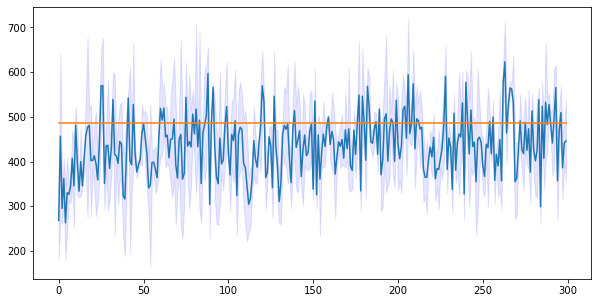

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

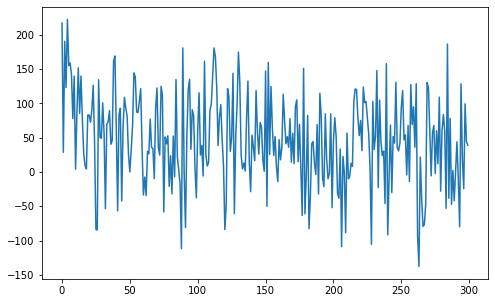

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

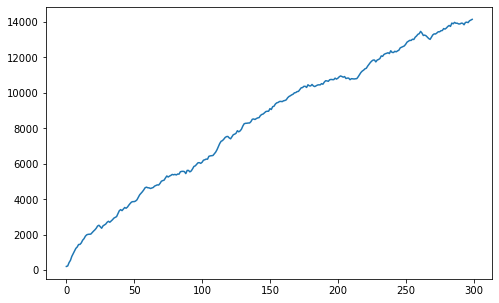

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()

TS

In [5]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ts5_learner = TSLearner5(n_arms, n_products, customer2, graph_json, arms)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ts5_learner.select_superarm()
        report = environment.round(super_arm)
        ts5_learner.update(super_arm.copy(), report)
    rewards = ts5_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape


Iteration # 1
loading: [============================= ] 96.7%
Iteration # 2
loading: [============================= ] 96.7%
Iteration # 3
loading: [============================= ] 96.7%

(3, 300)

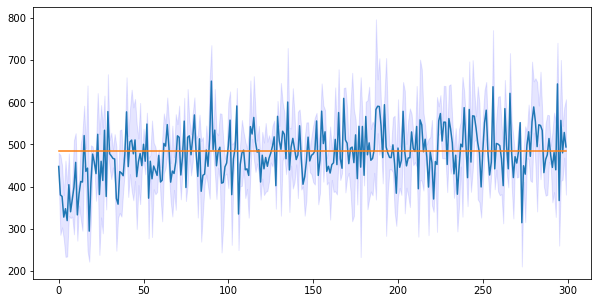

In [6]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(rewards))], [clairvoyant_reward for _ in range(len(rewards))])
plt.show()

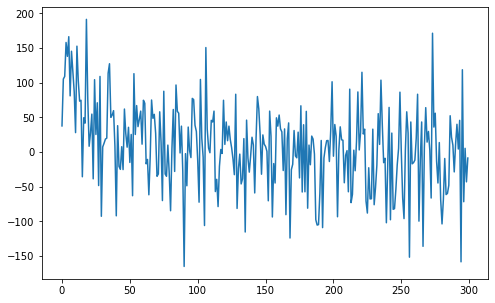

In [7]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
mean_regret = np.mean(regret, axis=0)

plt.plot(range(len(mean_regret)), mean_regret)
plt.show()

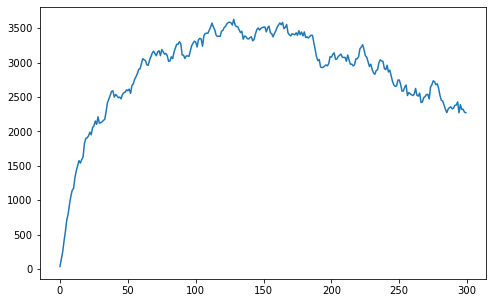

In [8]:
plt.figure(figsize=(8,5))
regret = clairvoyant_reward - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.show()